In [1]:
import sys
sys.path.append('../scripts')
from scripts.data_preprocessing import load_data, exclude_outliers
import matplotlib.pyplot as plt

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)


Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


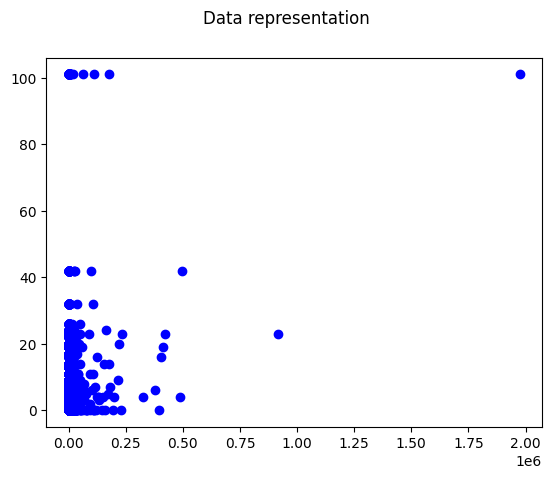

In [2]:
fig = plt.figure()
fig.suptitle('Data representation')
plt.plot(X, y, 'bo')
plt.show()

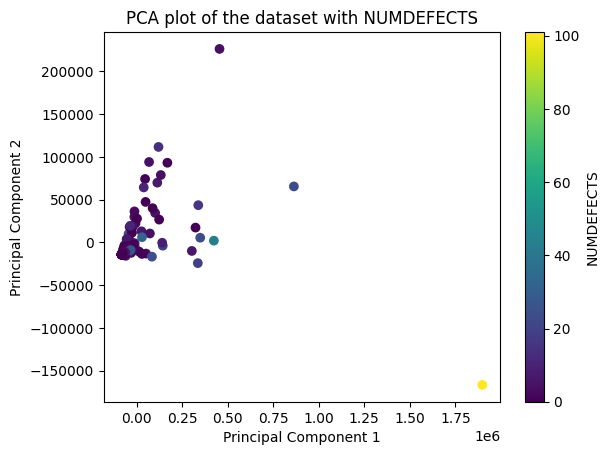

In [3]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Plotting the first two principal components against NUMDEFECTS
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='NUMDEFECTS')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot of the dataset with NUMDEFECTS')
plt.savefig('pca_numdefects_plot.png')
plt.show()

Principal Component Loadings:
                                      PC1           PC2
PERCENT_PUB_DATA             1.482605e-06 -4.965671e-05
ACCESS_TO_PUB_DATA           1.110223e-16 -1.110223e-16
COUPLING_BETWEEN_OBJECTS     1.118201e-05  4.719718e-05
DEPTH                        1.272522e-06  8.988207e-06
LACK_OF_COHESION_OF_METHODS  3.559529e-05  1.326914e-04
...                                   ...           ...
sumNUM_OPERANDS              2.373140e-03 -7.008542e-04
sumNUM_OPERATORS             3.775210e-03 -3.175916e-04
sumNUM_UNIQUE_OPERANDS       9.742231e-04 -3.781757e-04
sumNUM_UNIQUE_OPERATORS      6.882433e-04 -3.391866e-04
sumLOC_TOTAL                 1.907994e-03  7.353754e-04

[94 rows x 2 columns]


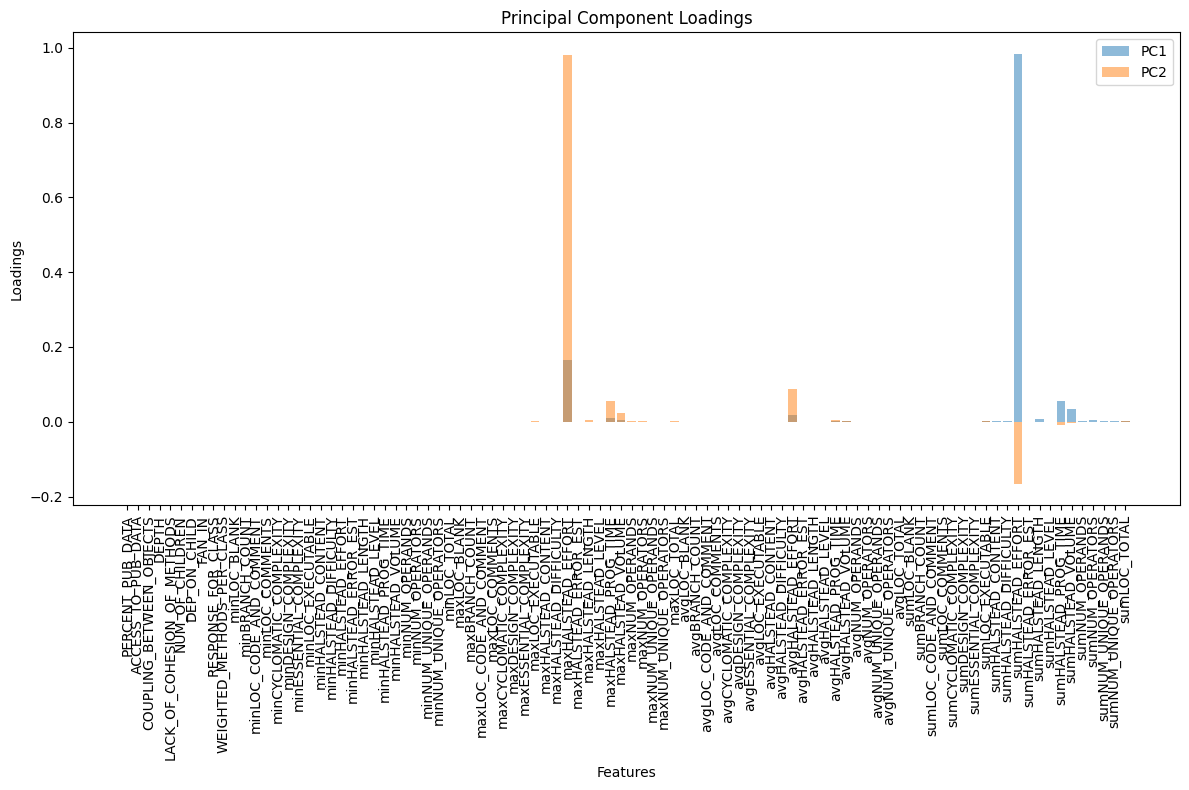

In [4]:
import pandas as pd
feature_names = [
    'PERCENT_PUB_DATA', 'ACCESS_TO_PUB_DATA', 'COUPLING_BETWEEN_OBJECTS', 'DEPTH',
    'LACK_OF_COHESION_OF_METHODS', 'NUM_OF_CHILDREN', 'DEP_ON_CHILD', 'FAN_IN',
    'RESPONSE_FOR_CLASS', 'WEIGHTED_METHODS_PER_CLASS', 'minLOC_BLANK', 'minBRANCH_COUNT',
    'minLOC_CODE_AND_COMMENT', 'minLOC_COMMENTS', 'minCYCLOMATIC_COMPLEXITY', 'minDESIGN_COMPLEXITY',
    'minESSENTIAL_COMPLEXITY', 'minLOC_EXECUTABLE', 'minHALSTEAD_CONTENT', 'minHALSTEAD_DIFFICULTY',
    'minHALSTEAD_EFFORT', 'minHALSTEAD_ERROR_EST', 'minHALSTEAD_LENGTH', 'minHALSTEAD_LEVEL',
    'minHALSTEAD_PROG_TIME', 'minHALSTEAD_VOLUME', 'minNUM_OPERANDS', 'minNUM_OPERATORS',
    'minNUM_UNIQUE_OPERANDS', 'minNUM_UNIQUE_OPERATORS', 'minLOC_TOTAL', 'maxLOC_BLANK',
    'maxBRANCH_COUNT', 'maxLOC_CODE_AND_COMMENT', 'maxLOC_COMMENTS', 'maxCYCLOMATIC_COMPLEXITY',
    'maxDESIGN_COMPLEXITY', 'maxESSENTIAL_COMPLEXITY', 'maxLOC_EXECUTABLE', 'maxHALSTEAD_CONTENT',
    'maxHALSTEAD_DIFFICULTY', 'maxHALSTEAD_EFFORT', 'maxHALSTEAD_ERROR_EST', 'maxHALSTEAD_LENGTH',
    'maxHALSTEAD_LEVEL', 'maxHALSTEAD_PROG_TIME', 'maxHALSTEAD_VOLUME', 'maxNUM_OPERANDS',
    'maxNUM_OPERATORS', 'maxNUM_UNIQUE_OPERANDS', 'maxNUM_UNIQUE_OPERATORS', 'maxLOC_TOTAL',
    'avgLOC_BLANK', 'avgBRANCH_COUNT', 'avgLOC_CODE_AND_COMMENT', 'avgLOC_COMMENTS',
    'avgCYCLOMATIC_COMPLEXITY', 'avgDESIGN_COMPLEXITY', 'avgESSENTIAL_COMPLEXITY', 'avgLOC_EXECUTABLE',
    'avgHALSTEAD_CONTENT', 'avgHALSTEAD_DIFFICULTY', 'avgHALSTEAD_EFFORT', 'avgHALSTEAD_ERROR_EST',
    'avgHALSTEAD_LENGTH', 'avgHALSTEAD_LEVEL', 'avgHALSTEAD_PROG_TIME', 'avgHALSTEAD_VOLUME',
    'avgNUM_OPERANDS', 'avgNUM_OPERATORS', 'avgNUM_UNIQUE_OPERANDS', 'avgNUM_UNIQUE_OPERATORS',
    'avgLOC_TOTAL', 'sumLOC_BLANK', 'sumBRANCH_COUNT', 'sumLOC_CODE_AND_COMMENT', 'sumLOC_COMMENTS',
    'sumCYCLOMATIC_COMPLEXITY', 'sumDESIGN_COMPLEXITY', 'sumESSENTIAL_COMPLEXITY', 'sumLOC_EXECUTABLE',
    'sumHALSTEAD_CONTENT', 'sumHALSTEAD_DIFFICULTY', 'sumHALSTEAD_EFFORT', 'sumHALSTEAD_ERROR_EST',
    'sumHALSTEAD_LENGTH', 'sumHALSTEAD_LEVEL', 'sumHALSTEAD_PROG_TIME', 'sumHALSTEAD_VOLUME',
    'sumNUM_OPERANDS', 'sumNUM_OPERATORS', 'sumNUM_UNIQUE_OPERANDS', 'sumNUM_UNIQUE_OPERATORS',
    'sumLOC_TOTAL'
]

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame to hold the loadings (components)
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)


# Display the loadings
print("Principal Component Loadings:")
print(loadings_df)

# Optional: Plot the loadings
plt.figure(figsize=(12, 8))
plt.bar(loadings_df.index, loadings_df['PC1'], alpha=0.5, label='PC1')
plt.bar(loadings_df.index, loadings_df['PC2'], alpha=0.5, label='PC2')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Principal Component Loadings')
plt.legend()
plt.tight_layout()
plt.show()